In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/staciesauer/Desktop/Bootcamp Analysis Projects/Project 3/la_data.csv")

/var/folders/gr/22f6q53d02b8h0kps1vy2dxm0000gn/T/ipykernel_1356/2937468219.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/staciesauer/Desktop/Bootcamp Analysis Projects/Project 3/la_data.csv")


In [4]:
df.head()

,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Weapon Description,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,34.0141,-118.2978,2020-01-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,34.0459,-118.2545,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,...,Unknown,Adult Arrest,845.0,Unknown,Unknown,Unknown,200 E 6TH ST,34.0448,-118.2474,2020-02-01
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,...,Unknown,Invest Cont,745.0,998.0,Unknown,Unknown,5400 CORTEEN PL,34.1685,-118.4019,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,...,Unknown,Invest Cont,740.0,Unknown,Unknown,Unknown,14400 TITUS ST,34.2198,-118.4468,2020-01-01


In [53]:
#4. [Stacie] Do these spatial patterns differ across different crime categories? (multiple visuals)


In [5]:
# Count occurrences of each crime description
grouped_crime_df = df.groupby("Crime Description").size()

# Sort grouped_crime_df by count in descending order and get the top 5
top_5_crimes = grouped_crime_df.sort_values(ascending=False).head(5)
print(top_5_crimes)


Crime Description
VEHICLE - STOLEN            91473
BATTERY - SIMPLE ASSAULT    67976
THEFT OF IDENTITY           53467
BURGLARY FROM VEHICLE       52611
BURGLARY                    51961
dtype: int64


In [6]:
grouped_crime_df.head()

Crime Description
ARSON                                              2349
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       1014
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    48876
ATTEMPTED ROBBERY                                  4435
BATTERY - SIMPLE ASSAULT                          67976
dtype: int64

In [9]:
# Get the top 5 crime types
top_5_crime_types = top_5_crimes.index.tolist()

# Filter the DataFrame for rows where the 'Crime Description' is in the top 5 crime types
filtered_df = df[df['Crime Description'].isin(top_5_crime_types)]

filtered_df.head()


,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Weapon Description,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,34.0141,-118.2978,2020-01-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,34.0459,-118.2545,2020-01-01
10,200100509,2020-01-04,2020-01-04 22:00:00,Central,192,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,...,ROCK/THROWN OBJECT,Invest Cont,330.0,Unknown,Unknown,Unknown,15TH,34.0359,-118.2648,2020-01-01
18,210916801,2021-11-22,2020-11-19 12:00:00,Van Nuys,932,354,THEFT OF IDENTITY,1501 1822,46,M,...,Unknown,Invest Cont,354.0,Unknown,Unknown,Unknown,14700 FRIAR ST,34.1857,-118.4574,2020-11-01
20,200914517,2020-09-10,2020-09-09 17:35:00,Van Nuys,909,354,THEFT OF IDENTITY,0377 1822 0928,40,M,...,Unknown,Invest Cont,354.0,Unknown,Unknown,Unknown,13600 LEADWELL ST,34.2039,-118.4312,2020-09-01


In [10]:
crime_desc = filtered_df["Crime Description"].unique()
crime_desc

array(['BATTERY - SIMPLE ASSAULT', 'BURGLARY FROM VEHICLE',
       'THEFT OF IDENTITY', 'BURGLARY', 'VEHICLE - STOLEN'], dtype=object)

In [11]:
div_num = filtered_df["Precinct"].unique()
div_num



array(['Southwest', 'Central', 'Van Nuys', 'West Valley', 'Northeast',
       'West LA', 'Harbor', 'Hollywood', 'Pacific', 'Wilshire',
       '77th Street', 'Foothill', 'Rampart', 'Hollenbeck', 'Devonshire',
       'N Hollywood', 'Olympic', 'Southeast', 'Mission', 'Topanga',
       'Newton'], dtype=object)

In [12]:
import pandas as pd

# Assuming 'filtered_df' contains your DataFrame

# Create a new DataFrame with the modifications
new_filtered_df = filtered_df.copy()  # Make a copy of the original DataFrame

# Convert the 'Occurrence Date' column to datetime format
new_filtered_df['Occurence Date'] = pd.to_datetime(new_filtered_df['Occurence Date'])

# Extract just the year
new_filtered_df['Year'] = new_filtered_df['Occurence Date'].dt.year

# Print the new DataFrame with the 'Year' column
new_filtered_df.head()


,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year,Year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,34.0141,-118.2978,2020-01-01,2020
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,34.0459,-118.2545,2020-01-01,2020
10,200100509,2020-01-04,2020-01-04 22:00:00,Central,192,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,...,Invest Cont,330.0,Unknown,Unknown,Unknown,15TH,34.0359,-118.2648,2020-01-01,2020
18,210916801,2021-11-22,2020-11-19 12:00:00,Van Nuys,932,354,THEFT OF IDENTITY,1501 1822,46,M,...,Invest Cont,354.0,Unknown,Unknown,Unknown,14700 FRIAR ST,34.1857,-118.4574,2020-11-01,2020
20,200914517,2020-09-10,2020-09-09 17:35:00,Van Nuys,909,354,THEFT OF IDENTITY,0377 1822 0928,40,M,...,Invest Cont,354.0,Unknown,Unknown,Unknown,13600 LEADWELL ST,34.2039,-118.4312,2020-09-01,2020


In [13]:
new_filtered_df.dtypes

Division Number                 int64
Report Date                    object
Occurence Date         datetime64[ns]
Precinct                       object
Reporting District              int64
Crime Code                      int64
Crime Description              object
Modus Operandi                 object
Victime Age                     int64
Victim Sex                     object
Victime Descent                object
Premise Description            object
Weapon Description             object
Status Description             object
Crime Code 1                   object
Crime Code 2                   object
Crime Code 3                   object
Crime Code 4                   object
Location                       object
Latitude                      float64
longitude                     float64
Month/Year                     object
Year                            int32
dtype: object

In [14]:

vehicle_stolen_df = new_filtered_df[new_filtered_df['Crime Description'].str.contains('VEHICLE - STOLEN', case=False)]
vehicle_stolen_df

,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year,Year
33,200117988,2020-09-15,2020-09-03 20:00:00,Central,111,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,500 N FIGUEROA ST,34.0615,-118.2470,2020-09-01,2020
78,200104073,2020-01-02,2020-01-02 03:45:00,Central,143,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,400 S SPRING ST,34.0488,-118.2500,2020-01-01,2020
104,200516527,2020-11-12,2020-11-12 04:30:00,Harbor,508,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,23400 PRESIDENT AV,33.8129,-118.3071,2020-11-01,2020
105,200609101,2020-04-15,2020-04-12 13:00:00,Hollywood,648,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Adult Other,510.0,Unknown,Unknown,Unknown,5700 HOLLYWOOD BL,34.1017,-118.3136,2020-04-01,2020
135,200306227,2020-02-07,2020-02-06 18:00:00,Southwest,397,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,43RD ST,34.0073,-118.2980,2020-02-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852889,230915370,2023-10-17,2023-10-17 10:00:00,Van Nuys,935,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,CALVERT ST,34.1816,-118.4487,2023-10-01,2023
852900,230713941,2023-08-30,2023-08-30 02:45:00,Wilshire,745,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,1000 S RIDGELEY DR,34.0574,-118.3525,2023-08-01,2023
852916,231309462,2023-04-20,2023-04-20 09:00:00,Newton,1343,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,900 E JEFFERSON BL,34.0136,-118.2611,2023-04-01,2023
852926,230406516,2023-03-19,2023-03-19 01:22:00,Hollenbeck,488,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,3200 GARNET ST,34.0248,-118.2076,2023-03-01,2023


In [13]:
import folium
from folium.plugins import MarkerCluster
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd

# Function to create markers from DataFrame rows
def create_markers(chunk_indices):
    markers = []
    for index in chunk_indices:
        row = vehicle_stolen_df.iloc[index]
        popup_text = f"Crime Description: {row['Crime Description']}<br>Precinct: {row['Precinct']}"
        marker = folium.Marker(location=(row['Latitude'], row['longitude']), popup=popup_text)
        markers.append(marker)
    return markers

# Define your DataFrame (new_filtered_df)
vehicle_stolen_df = pd.DataFrame(vehicle_stolen_df)

# Create a map
m = folium.Map(location=[34.052235, -118.243683], zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Split DataFrame indices into smaller chunks
chunk_size = 1000
index_chunks = [list(range(i, min(i + chunk_size, len(vehicle_stolen_df)))) for i in range(0, len(vehicle_stolen_df), chunk_size)]

# Use ThreadPoolExecutor for asynchronous processing
with ThreadPoolExecutor() as executor:
    # Submit tasks to create markers asynchronously
    future_to_chunk = {executor.submit(create_markers, chunk): chunk for chunk in index_chunks}

    # Wait for all tasks to complete
    for future in as_completed(future_to_chunk):
        try:
            # Get markers created by the task
            markers = future.result()
            # Add markers to the MarkerCluster
            for marker in markers:
                marker.add_to(marker_cluster)
        except Exception as e:
            print(f"Error: {e}")

# Display the map
m


In [14]:
vehicle_stolen_df.shape[0]

96

In [46]:
import folium
from folium.plugins import MarkerCluster, FloatImage
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
from jinja2 import Template
from folium.plugins import FloatImage
import branca

# Function to create markers from DataFrame rows
def create_markers(chunk_indices):
    markers = []
    for index in chunk_indices:
        row = vehicle_stolen_df.iloc[index]
        popup_text = f"Crime Description: {row['Crime Description']}<br>Precinct: {row['Precinct']}"
        html = f"""
            <div>
                <p>Crime Description: {row['Crime Description']}</p>
                <p>Precinct: {row['Precinct']}</p>
                <p>Year: {row['Year']}</p>
            </div>
        """
        popup = folium.Popup(html, max_width=300)
        marker = folium.Marker(
            location=(row['Latitude'], row['longitude']),
            popup=popup,
            tooltip=f"Year: {row['Year']}, Precinct: {row['Precinct']}"
        )
        markers.append(marker)
    return markers

# Create a map with attribution for OpenStreetMap
m = folium.Map(location=[34.052235, -118.243683], zoom_start=12, tiles='OpenStreetMap', attr='Map data &copy; <a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors')

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Create a feature group for the markers
feature_group = folium.FeatureGroup().add_to(marker_cluster)

# Use ThreadPoolExecutor for asynchronous processing
with ThreadPoolExecutor() as executor:
    # Submit tasks to create markers asynchronously
    future_to_chunk = {executor.submit(create_markers, chunk): chunk for chunk in index_chunks}

    # Wait for all tasks to complete
    for future in as_completed(future_to_chunk):
        try:
            markers = future.result()
            for marker in markers:
                marker.add_to(feature_group)  # Add marker to the feature group
        except Exception as e:
            print(f"Error: {e}")



# Add year dropdown
year_options = sorted(vehicle_stolen_df['Year'].unique())
year_dropdown_template = """
<div style="position: fixed; top: 10px; left: 10px; z-index: 1000; background-color: white; padding: 5px; border-radius: 5px;">
  <select id="year_dropdown">
    <option value="all">All</option>
    {% for option in year_options %}
      <option value="{{ option }}">{{ option }}</option>
    {% endfor %}
  </select>
</div>
"""
year_dropdown_html = Template(year_dropdown_template).render(year_options=year_options)
year_dropdown = branca.element.Element(year_dropdown_html)
m.get_root().html.add_child(year_dropdown)

# Add precinct dropdown
precinct_options = sorted(vehicle_stolen_df['Precinct'].dropna().unique())
precinct_dropdown_template = """
<div style="position: fixed; top: 10px; left: 150px; z-index: 1000; background-color: white; padding: 5px; border-radius: 5px;">
  <select id="precinct_dropdown">
    <option value="all">All</option>
    {% for option in precinct_options %}
      <option value="{{ option }}">{{ option }}</option>
    {% endfor %}
  </select>
</div>
"""
precinct_dropdown_html = Template(precinct_dropdown_template).render(precinct_options=precinct_options)
precinct_dropdown = branca.element.Element(precinct_dropdown_html)
m.get_root().html.add_child(precinct_dropdown)



# Add title
title_html = '<h3 align="center" style="font-size:20px"><b>Vehicle Stolen #1 Crime</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add attribution for OpenStreetMap
attribution = 'Map data &copy; <a href="https://www.openstreetmap.org/">OpenStreetMap</a> contributors'
folium.TileLayer('https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', attr=attribution, name='OpenStreetMap').add_to(m)

# Display the map
m
#this


In [40]:
precinct_dropdown_html

'\n<div style="position: fixed; top: 10px; left: 150px; z-index: 1000; background-color: white; padding: 5px; border-radius: 5px;">\n  <select id="precinct_dropdown">\n    <option value="all">All</option>\n    \n      <option value="77th Street">77th Street</option>\n    \n      <option value="Central">Central</option>\n    \n      <option value="Devonshire">Devonshire</option>\n    \n      <option value="Foothill">Foothill</option>\n    \n      <option value="Harbor">Harbor</option>\n    \n      <option value="Hollenbeck">Hollenbeck</option>\n    \n      <option value="Hollywood">Hollywood</option>\n    \n      <option value="Mission">Mission</option>\n    \n      <option value="N Hollywood">N Hollywood</option>\n    \n      <option value="Newton">Newton</option>\n    \n      <option value="Northeast">Northeast</option>\n    \n      <option value="Olympic">Olympic</option>\n    \n      <option value="Pacific">Pacific</option>\n    \n      <option value="Rampart">Rampart</option>\n    

In [17]:
import pandas as pd

crime_counts = df.groupby(['Crime Description', 'Precinct']).size().reset_index(name='Count')

# Sort the data by count in descending order
crime_counts_sorted = crime_counts.sort_values(by='Count', ascending=False)

# Get the top 5 crimes
top_5_crimes = crime_counts_sorted['Crime Description'].head(5)

# Initialize a list to store dictionaries
data_to_append = []

# Iterate over the top 5 crimes
for crime_category in top_5_crimes:
    # Filter the data for the current crime category
    crime_data = crime_counts_sorted[crime_counts_sorted['Crime Description'] == crime_category]
    # Get the top area (i.e., spatial unit with the highest count)
    top_area = crime_data.iloc[0]['Precinct']
    # Append the data to the list
    data_to_append.append({'Crime Description': crime_category, 'Top Area': top_area})

# Create a DataFrame from the list of dictionaries
top_areas_df = pd.DataFrame(data_to_append)

# Display the DataFrame containing the top area for each crime
print(top_areas_df)


                                Crime Description     Top Area
0               INTIMATE PARTNER - SIMPLE ASSAULT  77th Street
1                                VEHICLE - STOLEN  77th Street
2                                VEHICLE - STOLEN  77th Street
3                        BATTERY - SIMPLE ASSAULT       Newton
4  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  77th Street


In [18]:
import pandas as pd

# Assuming 'df' is your DataFrame
df['Count'] = df.groupby(['Crime Description', 'Precinct'])['Crime Description'].transform('count')

# Display the DataFrame to verify the changes
print(df.head())


        Division Number Report Date       Occurence Date     Precinct  \
428321        221611419  2022-08-14  2022-08-14 11:30:00     Foothill   
832425        231411280  2023-05-25  2023-05-25 08:30:00      Pacific   
40692         201110448  2020-06-15  2020-06-15 04:00:00    Northeast   
797460        230308469  2023-03-28  2023-03-27 23:00:00    Southwest   
351668        211514988  2021-08-25  2021-08-23 00:01:00  N Hollywood   

        Reporting District  Crime Code  \
428321                1691         510   
832425                1409         230   
40692                 1199         330   
797460                 357         522   
351668                1532         745   

                                        Crime Description  \
428321                                   VEHICLE - STOLEN   
832425     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT   
40692                               BURGLARY FROM VEHICLE   
797460  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...   
351

In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Group the data by Crime Description, Precinct, and get the sum of Count, Latitude, and longitude
crime_counts_grouped = df.groupby(['Crime Description', 'Precinct']).agg({'Count': 'sum', 'Latitude': 'mean', 'longitude': 'mean'}).reset_index()

# Sort the data by count in descending order
crime_counts_sorted = crime_counts_grouped.sort_values(by='Count', ascending=False)

# Get the top 5 crimes
top_5_crimes = crime_counts_sorted['Crime Description'].head(5)

# Create a Plotly figure with subplots
fig = make_subplots(rows=1, cols=1)

# Iterate over top 5 crimes and add heatmap traces
for crime_category in top_5_crimes:
    # Filter data for the current crime category
    crime_data = crime_counts_sorted[crime_counts_sorted['Crime Description'] == crime_category]
    # Create a heatmap trace for the current crime category
    heatmap_trace = go.Densitymapbox(lat=crime_data['Latitude'], lon=crime_data['longitude'], radius=15, z=crime_data['Count'], coloraxis="coloraxis", name=crime_category)
    # Add the trace to the figure
    fig.add_trace(heatmap_trace)

# Update layout
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=9, margin={"r":0,"t":0,"l":0,"b":0})

# Show the figure
fig.show()


KeyError: "Column(s) ['Count'] do not exist"

In [20]:
df.head()

,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year,Count
428321,221611419,2022-08-14,2022-08-14 11:30:00,Foothill,1691,510,VEHICLE - STOLEN,Unknown,0,Unknown,...,Invest Cont,510.0,Unknown,Unknown,Unknown,8100 ST CLAIR AV,34.2180,-118.3998,2022-08-01,4
832425,231411280,2023-05-25,2023-05-25 08:30:00,Pacific,1409,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 2004 1822 0445,63,M,...,Invest Cont,230.0,Unknown,Unknown,Unknown,9600 VENICE BL,34.0249,-118.3960,2023-05-01,4
40692,201110448,2020-06-15,2020-06-15 04:00:00,Northeast,1199,330,BURGLARY FROM VEHICLE,1607 0344,65,M,...,Invest Cont,330.0,Unknown,Unknown,Unknown,600 SOLANO AV,34.0755,-118.2321,2020-06-01,3
797460,230308469,2023-03-28,2023-03-27 23:00:00,Southwest,357,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",Unknown,0,Unknown,...,Invest Cont,522.0,Unknown,Unknown,Unknown,1300 W 37TH PL,34.0200,-118.2977,2023-03-01,2
351668,211514988,2021-08-25,2021-08-23 00:01:00,N Hollywood,1532,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,61,F,...,Invest Cont,745.0,Unknown,Unknown,Unknown,6300 WHITSETT AV,34.1849,-118.4053,2021-08-01,3


In [22]:
precinct_filtered_df.to_csv('precinct_filtered_data.csv')

NameError: name 'precinct_filtered_df' is not defined

In [16]:
precinct_filtered_df.count()

NameError: name 'precinct_filtered_df' is not defined

In [18]:
precinct_filtered_df = new_filtered_df.groupby(["Precinct","Crime Description"]).size()
precinct_filtered_df

Precinct     Crime Description       
77th Street  BATTERY - SIMPLE ASSAULT    4195
             BURGLARY                    1894
             BURGLARY FROM VEHICLE       1579
             THEFT OF IDENTITY           3849
             VEHICLE - STOLEN            7046
                                         ... 
Wilshire     BATTERY - SIMPLE ASSAULT    2898
             BURGLARY                    3344
             BURGLARY FROM VEHICLE       2739
             THEFT OF IDENTITY           2219
             VEHICLE - STOLEN            3326
Length: 105, dtype: int64

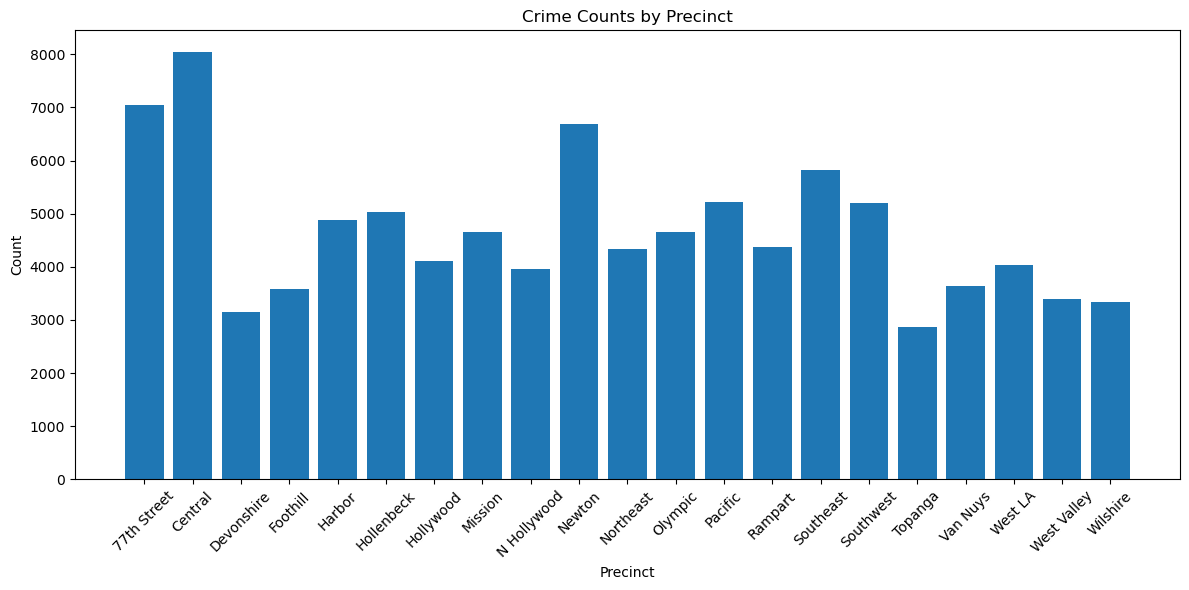

In [19]:
import matplotlib.pyplot as plt

# Extract relevant columns from the DataFrame
precincts = precinct_filtered_df.index.get_level_values(0)  
crime_descriptions = precinct_filtered_df.index.get_level_values(1)  
counts = precinct_filtered_df.values  # Extract counts

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(precincts, counts)
plt.xlabel('Precinct')
plt.ylabel('Count')
plt.title('Crime Counts by Precinct')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [36]:
new_filtered_df

,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year,Year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,Adult Other,624.0,Unknown,Unknown,Unknown,1100 W 39TH PL,34.0141,-118.2978,2020-01-01,2020
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,Invest Cont,624.0,Unknown,Unknown,Unknown,700 S HILL ST,34.0459,-118.2545,2020-01-01,2020
10,200100509,2020-01-04,2020-01-04 22:00:00,Central,192,330,BURGLARY FROM VEHICLE,1822 1414 0344 1307,29,M,...,Invest Cont,330.0,Unknown,Unknown,Unknown,15TH,34.0359,-118.2648,2020-01-01,2020
18,210916801,2021-11-22,2020-11-19 12:00:00,Van Nuys,932,354,THEFT OF IDENTITY,1501 1822,46,M,...,Invest Cont,354.0,Unknown,Unknown,Unknown,14700 FRIAR ST,34.1857,-118.4574,2020-11-01,2020
20,200914517,2020-09-10,2020-09-09 17:35:00,Van Nuys,909,354,THEFT OF IDENTITY,0377 1822 0928,40,M,...,Invest Cont,354.0,Unknown,Unknown,Unknown,13600 LEADWELL ST,34.2039,-118.4312,2020-09-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852931,230123693,2023-11-09,2023-11-09 19:08:00,Central,159,330,BURGLARY FROM VEHICLE,1300 1307 0344,39,M,...,Invest Cont,330.0,Unknown,Unknown,Unknown,JESSE ST,34.0365,-118.2292,2023-11-01,2023
852932,231007583,2023-04-03,2023-04-02 16:00:00,West Valley,1031,310,BURGLARY,1822 0344,37,M,...,Invest Cont,310.0,Unknown,Unknown,Unknown,19500 VICTORY BL,34.1866,-118.5582,2023-04-01,2023
852933,230817177,2023-11-22,2023-11-10 14:10:00,West LA,836,354,THEFT OF IDENTITY,0928,36,M,...,Invest Cont,354.0,Unknown,Unknown,Unknown,2100 OVERLAND AV,34.0474,-118.4294,2023-11-01,2023
852938,230914386,2023-09-20,2023-09-20 19:15:00,Van Nuys,935,624,BATTERY - SIMPLE ASSAULT,0416 1822,44,M,...,Invest Cont,624.0,Unknown,Unknown,Unknown,6200 SYLMAR AV,34.1837,-118.4465,2023-09-01,2023


In [38]:
year_central = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count').sort_values(by=["Precinct", "Crime Description", "Year"])
year_central

,Precinct,Crime Description,Year,Count
0,77th Street,BATTERY - SIMPLE ASSAULT,2020,985
1,77th Street,BATTERY - SIMPLE ASSAULT,2021,1012
2,77th Street,BATTERY - SIMPLE ASSAULT,2022,1050
3,77th Street,BATTERY - SIMPLE ASSAULT,2023,1148
4,77th Street,BURGLARY,2020,456
...,...,...,...,...
415,Wilshire,THEFT OF IDENTITY,2023,509
416,Wilshire,VEHICLE - STOLEN,2020,654
417,Wilshire,VEHICLE - STOLEN,2021,861
418,Wilshire,VEHICLE - STOLEN,2022,924


No artists with labels found to put in legend.


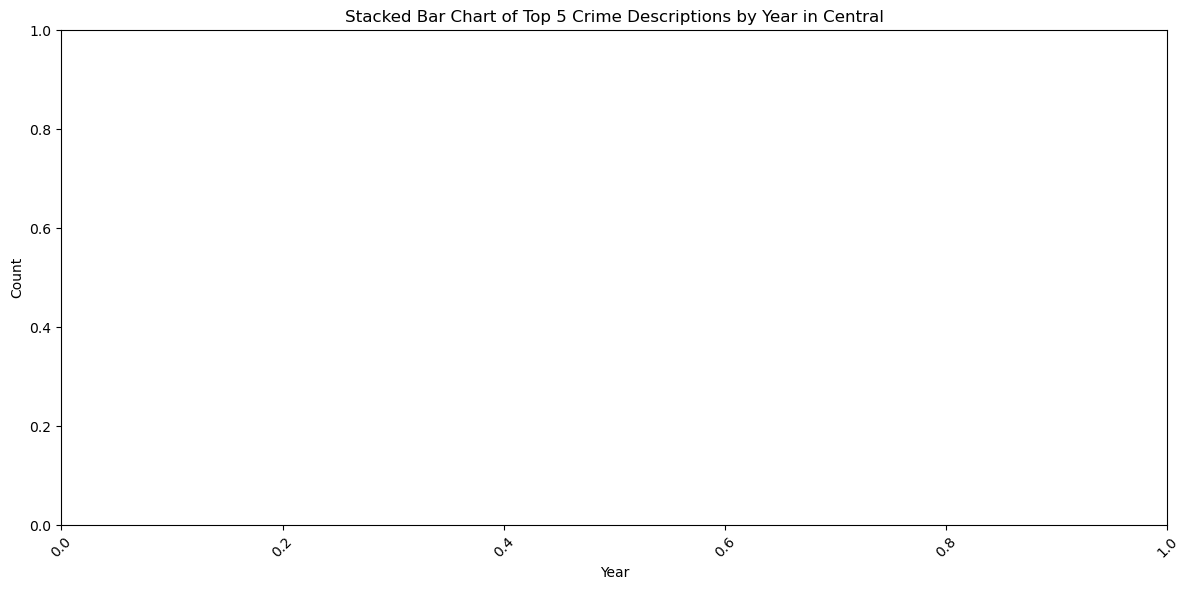

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_filtered_df contains the filtered DataFrame
year_central = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count')

# Filter the DataFrame for the "Central" precinct
year_central = year_central[year_central['Precinct'] == 'Central']

# Convert the 'Year' column to strings
year_central['Year'] = year_central['Year'].astype(str)

# Pivot the DataFrame
pivot_df = year_central.pivot_table(index='Crime Description', columns='Year', values='Count', fill_value=0)

# Get the top 5 most frequent crime descriptions
top_crimes = pivot_df.sum().nlargest(5).index

# Define custom colors for the top 5 crime descriptions
palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = pd.Series([0] * len(pivot_df.columns), index=pivot_df.columns)

for i, crime in enumerate(top_crimes):
    if crime in pivot_df.index:  # Check if the crime exists in the DataFrame
        plt.bar(pivot_df.columns, pivot_df.loc[crime], bottom=bottom, label=crime, color=palette[i % len(palette)], width=bar_width)
        bottom += pivot_df.loc[crime]  # Update the bottom values for the next stack

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 5 Crime Descriptions by Year in Central')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Check if there are bars with labels to display the legend
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(title='Crime Description')
else:
    print("No artists with labels found to put in legend.")

plt.tight_layout()
plt.show()


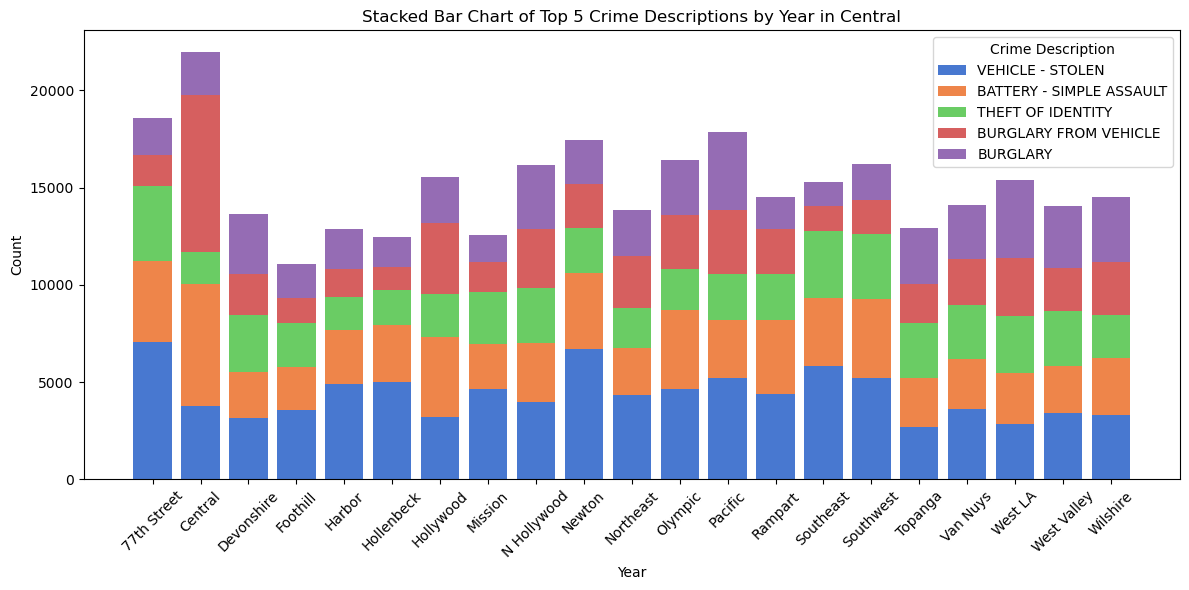

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Reshape the DataFrame to have precinct as index and crime descriptions as columns
stacked_df = precinct_filtered_df.unstack(level=1, fill_value=0)

# Get the top 5 most frequent crime descriptions
top_crimes = stacked_df.sum().nlargest(5).index

# Define custom colors for the top 5 crime descriptions using the "muted" palette
palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = np.zeros(len(stacked_df))

for i, crime in enumerate(top_crimes):
    plt.bar(stacked_df.index, stacked_df[crime], bottom=bottom, label=crime, color=palette[i], width=bar_width)
    bottom += stacked_df[crime]  # Update the bottom values for the next stack

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 5 Crime Descriptions by Year in Central')
plt.xticks(rotation=45)
plt.legend(title='Crime Description')

plt.tight_layout()
plt.show()


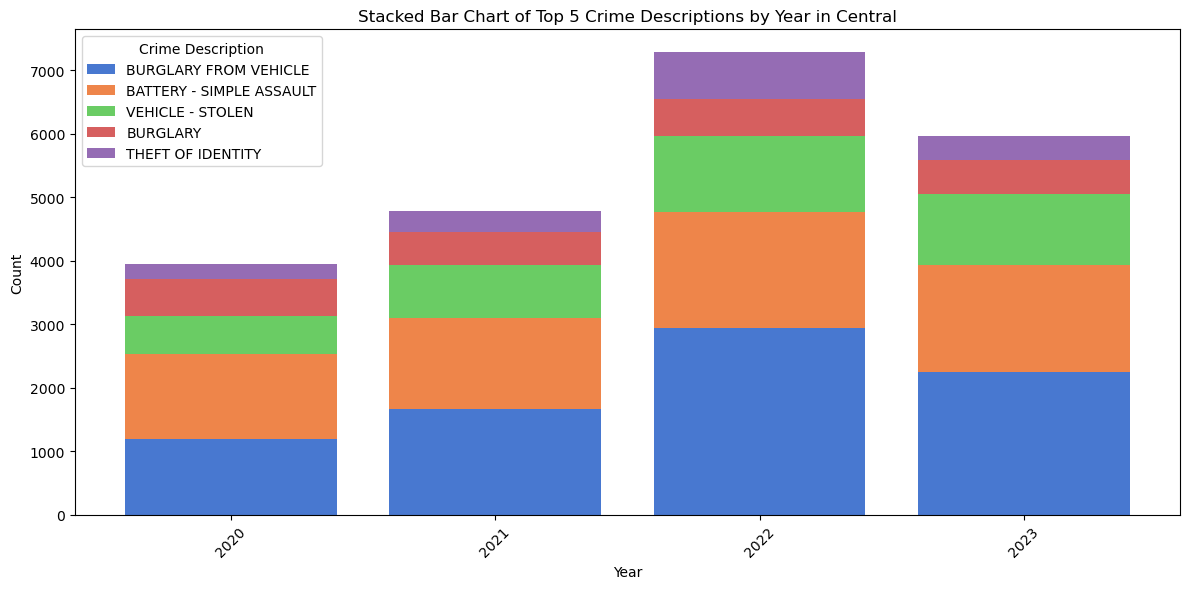

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_filtered_df contains the filtered DataFrame
year_central = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count')

# Filter the DataFrame for the "Central" precinct
year_central = year_central[year_central['Precinct'] == 'Central']

# Convert the 'Year' column to strings
year_central['Year'] = year_central['Year'].astype(str)

# Pivot the DataFrame
pivot_df = year_central.pivot_table(index='Crime Description', columns='Year', values='Count', fill_value=0)

# Get the top 5 most frequent crime descriptions
top_crimes = pivot_df.sum(axis=1).nlargest(5).index

# Define custom colors for the top 5 crime descriptions
palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = pd.Series([0] * len(pivot_df.columns), index=pivot_df.columns)

for i, crime in enumerate(top_crimes):
    plt.bar(pivot_df.columns, pivot_df.loc[crime], bottom=bottom, label=crime, color=palette[i % len(palette)], width=bar_width)
    bottom += pivot_df.loc[crime]  # Update the bottom values for the next stack

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 5 Crime Descriptions by Year in Central')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Check if there are bars with labels to display the legend
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(title='Crime Description')
else:
    print("No artists with labels found to put in legend.")

plt.tight_layout()
plt.show()


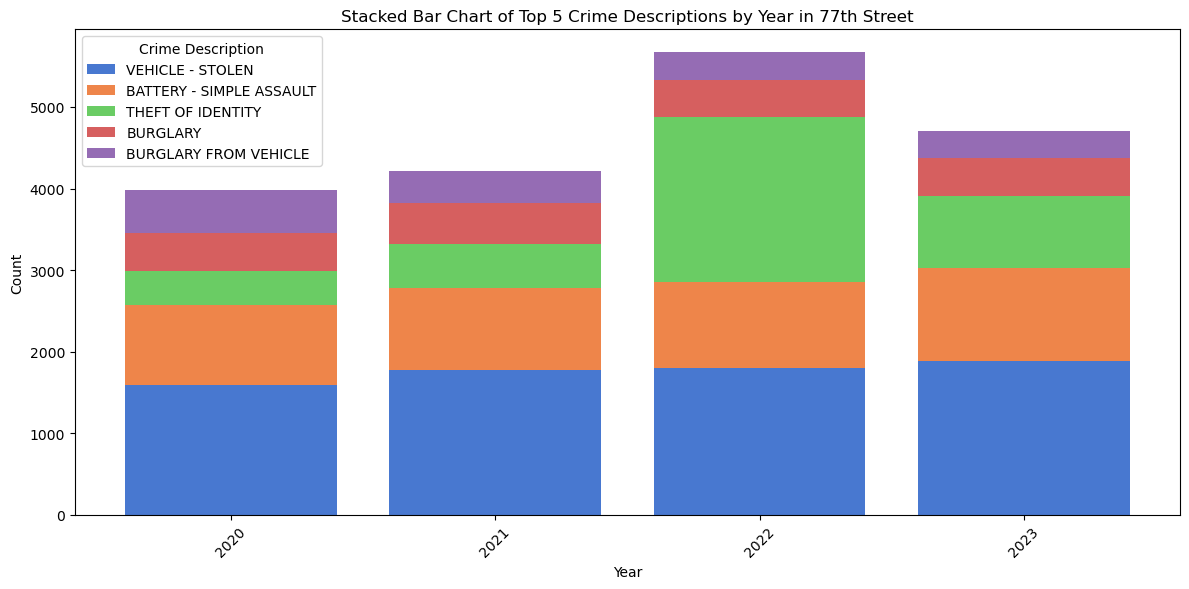

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_filtered_df contains the filtered DataFrame
year_central = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count')

# Filter the DataFrame for the "Central" precinct
year_central = year_central[year_central['Precinct'] == '77th Street']

# Convert the 'Year' column to strings
year_central['Year'] = year_central['Year'].astype(str)

# Pivot the DataFrame
pivot_df = year_central.pivot_table(index='Crime Description', columns='Year', values='Count', fill_value=0)

# Get the top 5 most frequent crime descriptions
top_crimes = pivot_df.sum(axis=1).nlargest(5).index

# Define custom colors for the top 5 crime descriptions
palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = pd.Series([0] * len(pivot_df.columns), index=pivot_df.columns)

for i, crime in enumerate(top_crimes):
    plt.bar(pivot_df.columns, pivot_df.loc[crime], bottom=bottom, label=crime, color=palette[i % len(palette)], width=bar_width)
    bottom += pivot_df.loc[crime]  # Update the bottom values for the next stack

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 5 Crime Descriptions by Year in 77th Street')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Check if there are bars with labels to display the legend
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(title='Crime Description')
else:
    print("No artists with labels found to put in legend.")

plt.tight_layout()
plt.show()


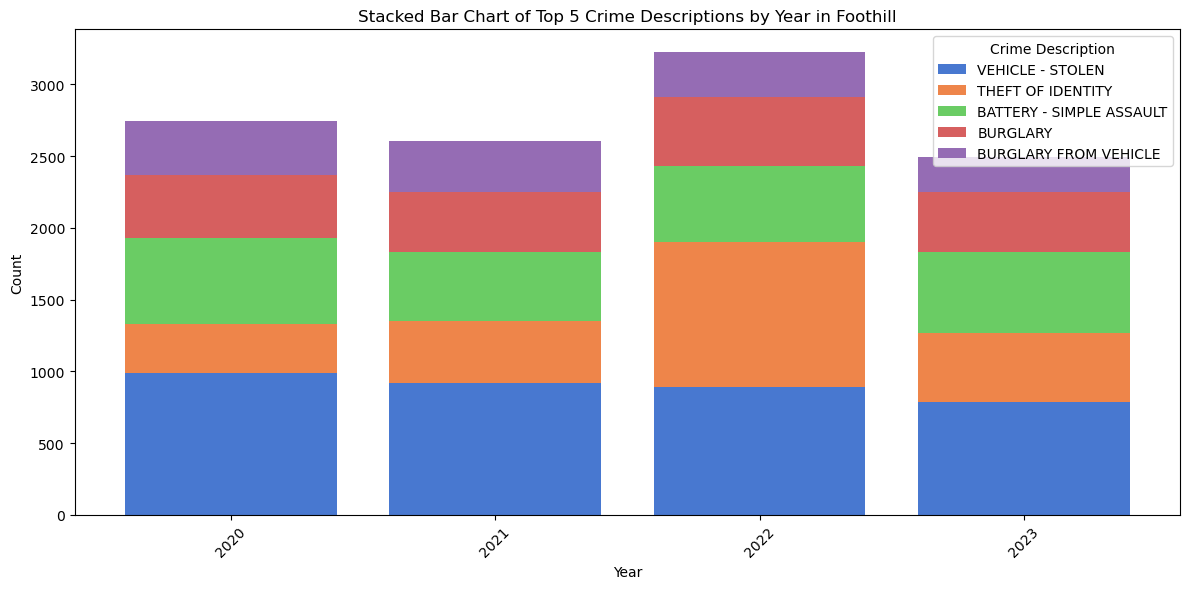

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_filtered_df contains the filtered DataFrame
year_central = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count')

# Filter the DataFrame for the "Central" precinct
year_central = year_central[year_central['Precinct'] == 'Foothill']

# Convert the 'Year' column to strings
year_central['Year'] = year_central['Year'].astype(str)

# Pivot the DataFrame
pivot_df = year_central.pivot_table(index='Crime Description', columns='Year', values='Count', fill_value=0)

# Get the top 5 most frequent crime descriptions
top_crimes = pivot_df.sum(axis=1).nlargest(5).index

# Define custom colors for the top 5 crime descriptions
palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = pd.Series([0] * len(pivot_df.columns), index=pivot_df.columns)

for i, crime in enumerate(top_crimes):
    plt.bar(pivot_df.columns, pivot_df.loc[crime], bottom=bottom, label=crime, color=palette[i % len(palette)], width=bar_width)
    bottom += pivot_df.loc[crime]  # Update the bottom values for the next stack

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 5 Crime Descriptions by Year in Foothill')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Check if there are bars with labels to display the legend
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend(title='Crime Description')
else:
    print("No artists with labels found to put in legend.")

plt.tight_layout()
plt.show()


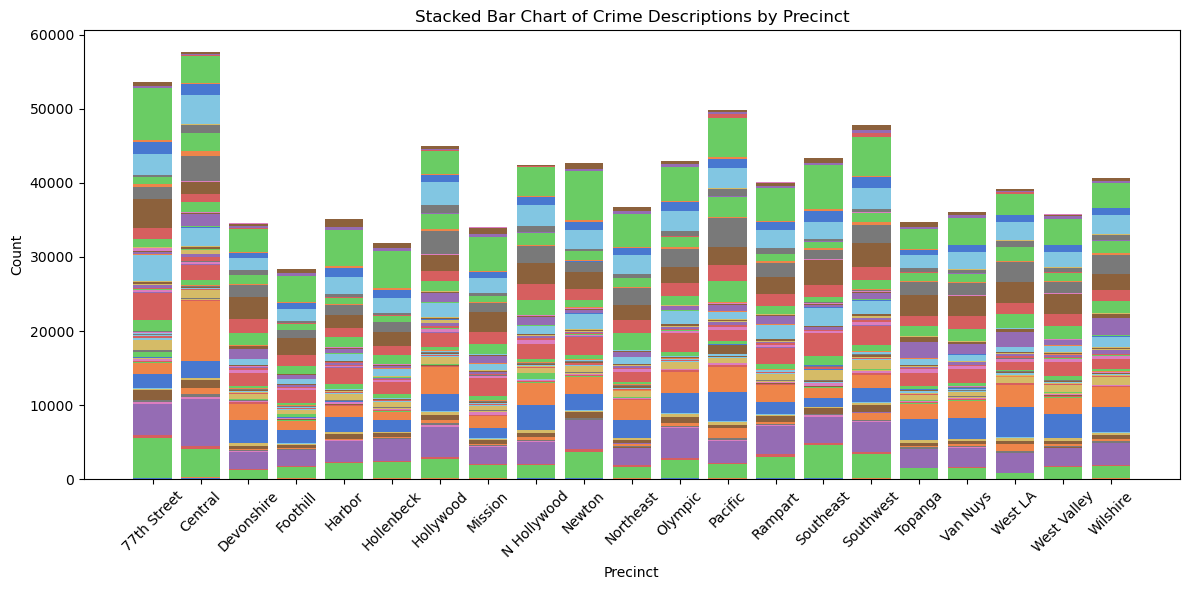

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming df is your DataFrame with 'Precinct' and 'Crime Description' columns
all_crime_df = df.groupby(["Precinct", "Crime Description"]).size().unstack(fill_value=0)

palette = sns.color_palette('muted')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Set the width of the bars to overlap slightly
bar_width = 0.8

bottom = np.zeros(len(all_crime_df))

for i, crime in enumerate(all_crime_df.columns):
    plt.bar(all_crime_df.index, all_crime_df[crime], bottom=bottom, color=palette[i % len(palette)], label=crime, width=bar_width)
    bottom += all_crime_df[crime]  # Update the bottom values for the next stack

plt.xlabel('Precinct')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Crime Descriptions by Precinct')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [68]:
new_year = new_filtered_df.groupby(["Precinct", "Crime Description", "Year"]).size().reset_index(name='Count')

In [69]:
new_year.to_csv('year_central.csv', index=False)


In [67]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from ipyleaflet import Map, Marker, MarkerCluster
import pandas as pd  

# Function to create markers from DataFrame rows
def create_markers(chunk_indices):
    markers = []
    for index in chunk_indices:
        row = vehicle_stolen_df.iloc[index]
        marker = Marker(location=(row['Latitude'], row['longitude']))
        marker.crime_description = row['Crime Description']
        marker.precinct = row['Precinct']
        markers.append(marker)
    return markers

# Define your DataFrame (new_filtered_df)
vehicle_stolen_df = pd.DataFrame(vehicle_stolen_df)  

# Create a map widget
m = Map(center=(34.052235, -118.243683), zoom=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster()

# Split DataFrame indices into smaller chunks
chunk_size = 1000
index_chunks = [list(range(i, min(i + chunk_size, len(vehicle_stolen_df)))) for i in range(0, len(vehicle_stolen_df), chunk_size)]

# Use ThreadPoolExecutor for asynchronous processing
with ThreadPoolExecutor() as executor:
    # Submit tasks to create markers asynchronously
    future_to_chunk = {executor.submit(create_markers, chunk): chunk for chunk in index_chunks}

    # Wait for all tasks to complete
    for future in as_completed(future_to_chunk):
        try:
            # Get markers created by the task
            markers = future.result()
            # Add markers to the MarkerCluster
            for marker in markers:
                marker_cluster.add_layer(marker)
        except Exception as e:
            print(f"Error: {e}")

# Add MarkerCluster to the map
m.add_layer(marker_cluster)

# Display the map
m


Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_layer'
Error: 'MarkerCluster' object has no attribute 'add_laye

Map(center=[34.052235, -118.243683], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [ ]:
from ipyleaflet import Map, CircleMarker, MarkerCluster
from ipywidgets import Dropdown
import pandas as pd
from ipyleaflet import CircleMarker, Popup

# Create a marker cluster
marker_cluster = MarkerCluster()


# Create a map centered around Los Angeles
m = Map(center=(34.052235, -118.243683), zoom=10)

# Add marker cluster to the map
m.add_layer(marker_cluster)



from ipyleaflet import CircleMarker, Popup, MarkerCluster
from ipywidgets import HTML

# Assuming marker_cluster is an instance of MarkerCluster
marker_cluster = MarkerCluster()

# Function to add circle markers for selected criteria
def add_markers(new_filtered_df, year, precinct, crime_description):
    # Clear existing markers from the marker cluster
    marker_cluster.clear_layers()
    
    # Filter DataFrame based on selected criteria
    selected_data = new_filtered_df[
        (new_filtered_df['Year'] == year) &
        (new_filtered_df['Precinct'] == precinct) &
        (new_filtered_df['Crime Description'] == crime_description)
    ]
    
    # Add circle markers for selected data
    for _, row in selected_data.iterrows():
        circle_marker = CircleMarker(location=(row['Latitude'], row['longitude']), radius=5, color='green', fill_color='green', fill_opacity=0.5)
        popup_content = HTML(value=row['Crime Description'])
        popup = Popup(location=(row['Latitude'], row['longitude']), child=popup_content)
        circle_marker.popup = popup
        m.add_layer(circle_marker)  # Add circle marker to the map

    # Refresh the map display
    display(m)






# Get unique years, precincts, and crime descriptions
unique_years = new_filtered_df['Year'].unique()
unique_precincts = new_filtered_df['Precinct'].unique()
unique_crime_descriptions = new_filtered_df['Crime Description'].unique()

# Create dropdown menus
year_dropdown = Dropdown(options=unique_years, description='Year:')
precinct_dropdown = Dropdown(options=unique_precincts, description='Precinct:')
crime_dropdown = Dropdown(options=unique_crime_descriptions, description='Crime:')

# Event handler for dropdowns
def on_dropdown_change(change):
    if change['name'] == 'value':
        year = year_dropdown.value
        precinct = precinct_dropdown.value
        crime_description = crime_dropdown.value
        add_markers(year, precinct, crime_description)

year_dropdown.observe(on_dropdown_change)
precinct_dropdown.observe(on_dropdown_change)
crime_dropdown.observe(on_dropdown_change)

# Display the dropdown menus and the map
display(year_dropdown, precinct_dropdown, crime_dropdown, m)


In [ ]:
from ipyleaflet import Map, CircleMarker, Popup, LayerGroup
from ipywidgets import Dropdown, Layout

# Function to add circle markers for selected criteria
def add_markers(new_filtered_df, year, precinct, crime_description):
    # Clear existing markers from the map
    markers_layer.clear_layers()

    # Filter DataFrame based on selected criteria
    selected_data = new_filtered_df[
        (new_filtered_df['Year'] == year) &
        (new_filtered_df['Precinct'] == precinct) &
        (new_filtered_df['Crime Description'] == crime_description)
    ]
    
    # Add circle markers for selected data
    for _, row in selected_data.iterrows():
        circle_marker = CircleMarker(location=(row['Latitude'], row['longitude']), radius=5, color='green', fill_color='green', fill_opacity=0.5)
        popup = Popup(location=(row['Latitude'], row['longitude']), child=HTML(value=row['Crime Description']))
        circle_marker.popup = popup
        markers_layer.add_layer(circle_marker)  # Add circle marker to the markers layer
    
    # Update map center and zoom to fit all markers
    if not selected_data.empty:
        center_lat = selected_data['Latitude'].mean()
        center_lon = selected_data['longitude'].mean()
        m.center = (center_lat, center_lon)
        m.zoom = 10

# Event handler for dropdowns
def on_dropdown_change(change):
    if change['name'] == 'value':
        year = year_dropdown.value
        precinct = precinct_dropdown.value
        crime_description = crime_dropdown.value
        add_markers(new_filtered_df, year, precinct, crime_description)

# Create a map centered around Los Angeles
m = Map(center=(34.052235, -118.243683), zoom=10)

# Get unique years, precincts, and crime descriptions
unique_years = new_filtered_df['Year'].unique()
unique_precincts = new_filtered_df['Precinct'].unique()
unique_crime_descriptions = new_filtered_df['Crime Description'].unique()

# Create dropdown menus
year_dropdown = Dropdown(options=unique_years, description='Year:', layout=Layout(width='200px'))
precinct_dropdown = Dropdown(options=unique_precincts, description='Precinct:', layout=Layout(width='200px'))
crime_dropdown = Dropdown(options=unique_crime_descriptions, description='Crime:', layout=Layout(width='200px'))

year_dropdown.observe(on_dropdown_change)
precinct_dropdown.observe(on_dropdown_change)
crime_dropdown.observe(on_dropdown_change)

# Display the dropdown menus and the map
display(year_dropdown, precinct_dropdown, crime_dropdown, m)

# Create a LayerGroup to store markers
markers_layer = LayerGroup()

# Add the markers layer to the map
m.add_layer(markers_layer)


In [33]:
precinct_filtered_df


Precinct     Crime Description       
77th Street  BATTERY - SIMPLE ASSAULT    4195
             BURGLARY                    1894
             BURGLARY FROM VEHICLE       1579
             THEFT OF IDENTITY           3849
             VEHICLE - STOLEN            7046
                                         ... 
Wilshire     BATTERY - SIMPLE ASSAULT    2898
             BURGLARY                    3344
             BURGLARY FROM VEHICLE       2739
             THEFT OF IDENTITY           2219
             VEHICLE - STOLEN            3326
Length: 105, dtype: int64

In [73]:
all_crime_df.shape[1]

138